In [28]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import numpy as np
import glob
import cv2
import h5py
import pickle as pkl
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import ZeroPadding2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import EarlyStopping

from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam, Adagrad

from keras.utils import np_utils 
from keras import backend as K

from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import svm

### Import data

In [9]:
# Read data
import scipy.io as sio

train_contents = sio.loadmat('dados_treinamento.mat')
valid_contents = sio.loadmat('dados_val.mat')
test_contents = sio.loadmat('dados_teste.mat')

X_train = train_contents['X']
y_train = train_contents['y'] 

X_valid = valid_contents['Xval']
y_valid = valid_contents['yval']

X_test = test_contents['Xt']
y_test = test_contents['yt'] 

print(len(X_train), len(X_valid), len(X_test))
print(X_train.shape, y_train.shape)
print(X_train[1], y_train[1])

y_t = np.ravel(y_train)
y_t.shape

1000 1000 1000
(1000, 2) (1000, 1)
[1.00607263 0.59525643] [1]


(1000,)

### MLP - Testing different architectures

Arquitetura: MLP - Loss: mae - Epochs: 2000 - Neurons: 64


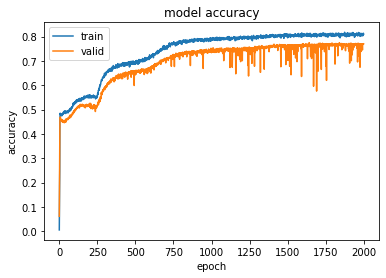

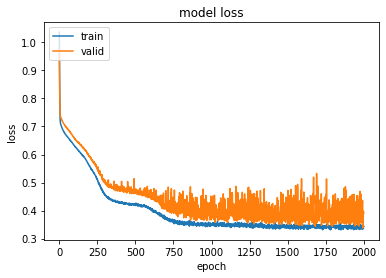

Accuracy: 78.10%


In [11]:

# Hyperparameters
epochs = 2000
batch_size = 24
int_neurons = 64
loss = 'mae'
opt = SGD(learning_rate=0.01)

# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
history_mlp  = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=epochs, batch_size=batch_size, verbose=0)

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_64 = model
history_64 = history_mlp

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: mae - Epochs: 2000 - Neurons: 64


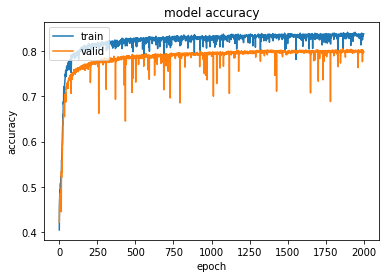

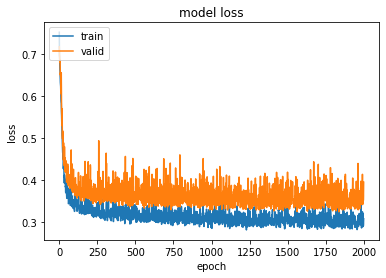

Accuracy: 81.10%


In [13]:
# Hyperparameters
epochs = 2000
batch_size = 24
int_neurons = 64
loss = 'mae'
opt = Adam(learning_rate=0.01)

# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
history_mlp  = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=epochs, batch_size=batch_size, verbose=0)

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_64 = model
history_64 = history_mlp

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: mae - Epochs: 10000 - Neurons: 64


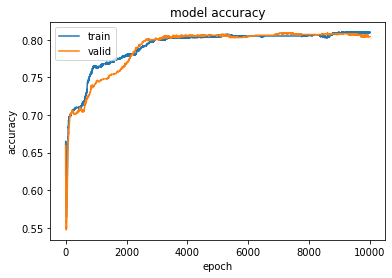

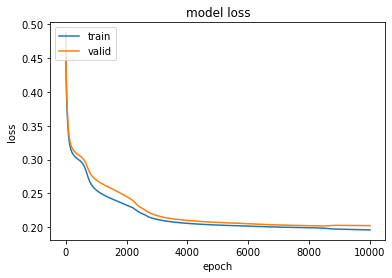

Accuracy: 80.70%


In [18]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 000
batch_size = 24
int_neurons = 64
loss = 'mae'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0)

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_64 = model
history_64 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: mae - Epochs: 10000 - Neurons: 64


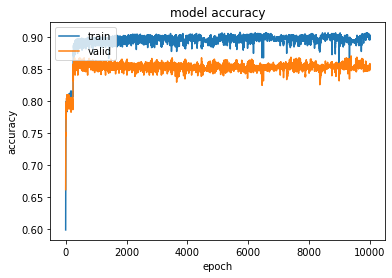

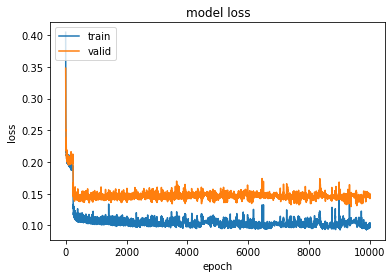

Accuracy: 86.70%


In [19]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 64
loss = 'mae'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0)

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_64 = model
history_64 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 64
Epoch 02175: early stopping


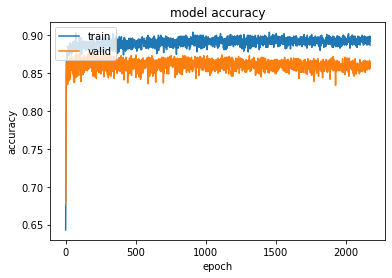

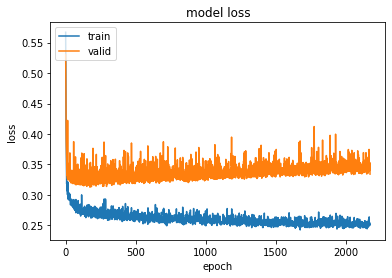

Accuracy: 87.60%


In [43]:
#NETWORK FOR SIGMOID! AQUI ONDE EU MEXI
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 64
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_64 = model
history_64 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 128
Epoch 02083: early stopping


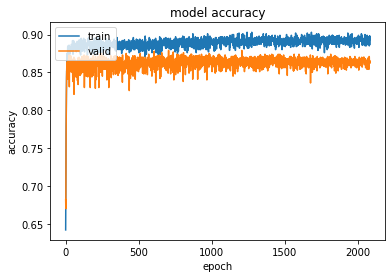

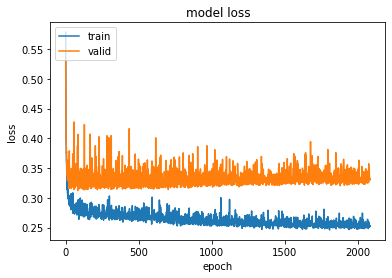

Accuracy: 87.20%


In [44]:
#NETWORK FOR SIGMOID! AQUI ONDE EU MEXI
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 128
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_128 = model
history_128 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 256
Epoch 02156: early stopping


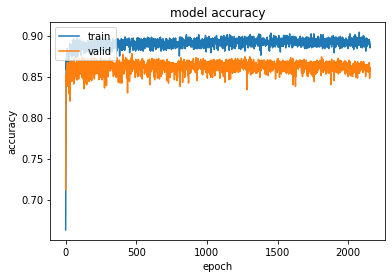

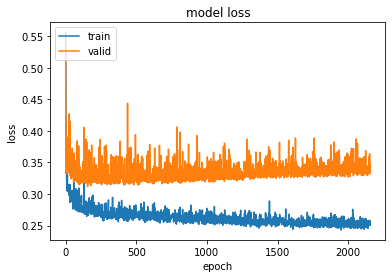

Accuracy: 86.10%


In [31]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 256
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_256 = model
history_256 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 512
Epoch 02137: early stopping


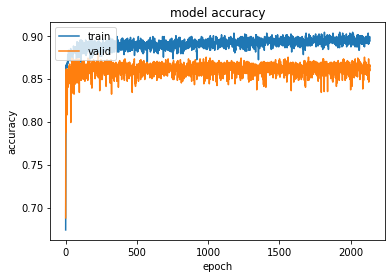

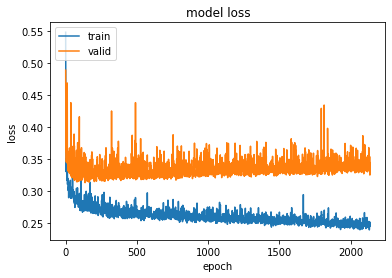

Accuracy: 87.60%


In [52]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 512
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_512 = model
history_512 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 1024
Epoch 02130: early stopping


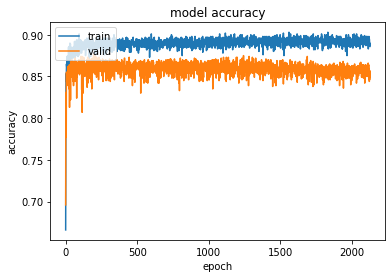

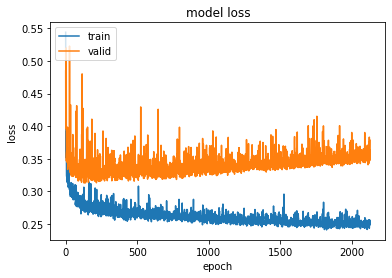

Accuracy: 86.90%


In [37]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 1024
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_1024 = model
history_1024 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Arquitetura: MLP - Loss: binary_crossentropy - Epochs: 10000 - Neurons: 2048
Epoch 02165: early stopping


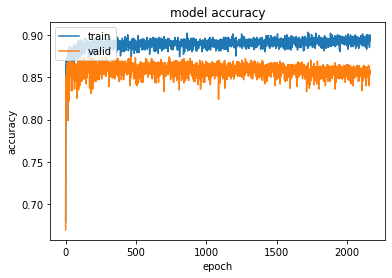

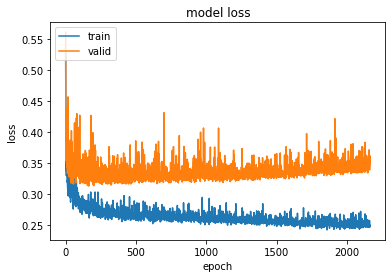

Accuracy: 87.50%


In [36]:
#NETWORK FOR SIGMOID!
# Hyperparameters
epochs = 10000
batch_size = 24
int_neurons = 2048
loss = 'binary_crossentropy'
opt = Adam(learning_rate=0.01)

#Label transformation
y_train_norm = 0.5*y_train + 0.5
y_valid_norm = 0.5*y_valid + 0.5
y_test_norm = 0.5*y_test + 0.5


# Define model
model = Sequential()
model.add(Dense(int_neurons, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

#model.summary()

print('Arquitetura: MLP - Loss:', loss,'- Epochs:', epochs, '- Neurons:', int_neurons)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)
history_mlp  = model.fit(X_train, y_train_norm, validation_data = (X_valid, y_valid_norm), epochs=epochs, batch_size=batch_size, verbose=0, callbacks = [es])

# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

model_2048 = model
history_2048 = history_mlp

scores = model.evaluate(X_test, y_test_norm, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### Regiões de decisão

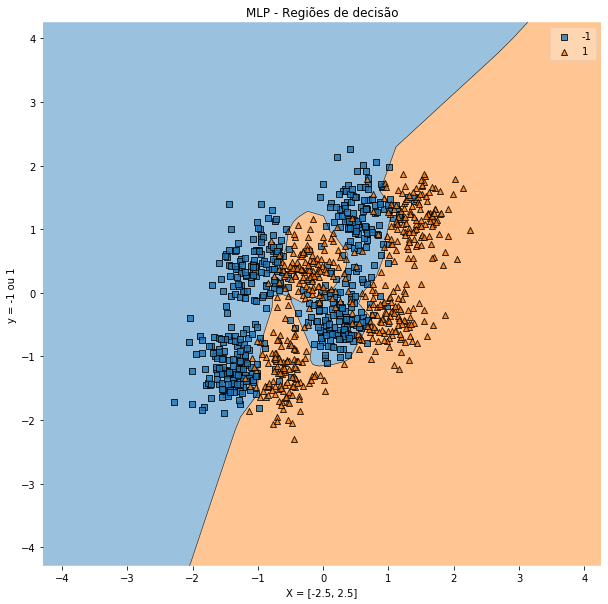

In [55]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
fig = plt.figure(figsize=(10,10))
fig = plot_decision_regions(X_train, y_t, clf=model_64, legend=1, zoom_factor=0.5)

# Adding axes annotations
plt.xlabel('X = [-2.5, 2.5]')
plt.ylabel('y = -1 ou 1')
plt.title('MLP - Regiões de decisão')
plt.show()

### Percentual de erro

In [50]:
scores = model_64.evaluate(X_test, y_test_norm, verbose=0)
print("Loss: {1:f}, Accuracy: {0:.2f}%".format(scores[1]*100, scores[0]))

Loss: 0.318476, Accuracy: 87.60%


### Modificando número de neurons

### SVM

In [23]:
svmclassifier = svm.SVC(kernel = 'linear', gamma='auto', C=1)
svmclassifier.fit(X_train, y_t)
y_pred = svmclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[331 168]
 [166 335]]
              precision    recall  f1-score   support

          -1       0.67      0.66      0.66       499
           1       0.67      0.67      0.67       501

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



In [24]:
svmclassifier = svm.SVC(kernel = 'poly', gamma='auto', C=1)
svmclassifier.fit(X_train, y_t)
y_pred = svmclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[409  90]
 [159 342]]
              precision    recall  f1-score   support

          -1       0.72      0.82      0.77       499
           1       0.79      0.68      0.73       501

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000



In [85]:
svmclassifier = svm.SVC(kernel = 'rbf', gamma='auto', C=2.1)
svmclassifier.fit(X_train, y_t)
y_pred = svmclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[440  59]
 [ 65 436]]
              precision    recall  f1-score   support

          -1       0.87      0.88      0.88       499
           1       0.88      0.87      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [84]:
svmclassifier = svm.SVC(kernel = 'sigmoid', gamma='auto', C=2.1)
svmclassifier.fit(X_train, y_t)
y_pred = svmclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[214 285]
 [302 199]]
              precision    recall  f1-score   support

          -1       0.41      0.43      0.42       499
           1       0.41      0.40      0.40       501

    accuracy                           0.41      1000
   macro avg       0.41      0.41      0.41      1000
weighted avg       0.41      0.41      0.41      1000



### Regiões de decisão

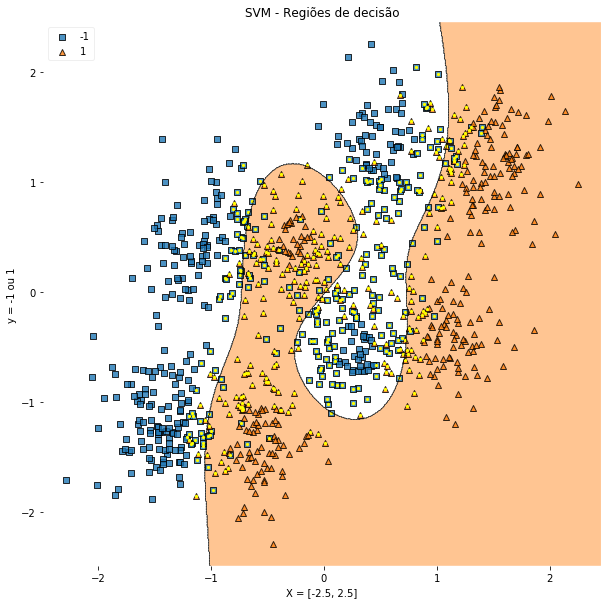

In [86]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
fig = plt.figure(figsize=(10,10))
fig = plot_decision_regions(X_train, y_t, clf=svmclassifier, legend=2, zoom_factor=5)
fig.scatter(svmclassifier.support_vectors_[:, 0],
           svmclassifier.support_vectors_[:, 1],
           s=5, linewidth=1, facecolors='yellow');

# Adding axes annotations
plt.xlabel('X = [-2.5, 2.5]')
plt.ylabel('y = -1 ou 1')
plt.title('SVM - Regiões de decisão')
plt.show()

### Percentual de erro

In [87]:
scores = svmclassifier.score(X_test, y_test)
print("Accuracy: {0:.2f}%".format(scores*100))

Accuracy: 87.60%


In [83]:
for c in np.linspace(0.1, 10, 100):
    print('C:', c)
    svmclassifier = svm.SVC(kernel = 'rbf', gamma='auto', C=c)
    svmclassifier.fit(X_train, y_t)
    y_pred = svmclassifier.predict(X_test)

    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

C: 0.1
[[358 141]
 [136 365]]
              precision    recall  f1-score   support

          -1       0.72      0.72      0.72       499
           1       0.72      0.73      0.72       501

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

C: 0.2
[[399 100]
 [138 363]]
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77       499
           1       0.78      0.72      0.75       501

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000

C: 0.30000000000000004
[[444  55]
 [114 387]]
              precision    recall  f1-score   support

          -1       0.80      0.89      0.84       499
           1       0.88      0.77      0.82       501

    accuracy                           0.83      1000
   macro avg       0.8